# Gate Visualization

Here we will learn how to apply the squeezing gate on one qumode in the vacuum state and ouput the gaussian probability distribition of our new state. 

## Vacuum State

The vacuum state is the initial state of the qumode and it has squeezing and displacement parameters = 0. 

Import strawberryfields, numpy and matplotlib.pyplot.

In [58]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
import numpy as np
import matplotlib.pyplot as plt

Initialize engine with one qumode.

In [59]:
eng, q = sf.Engine(1)

In [60]:
with eng:
    Vac | q[0]

Measurement:

In [61]:
state = eng.run('gaussian')

Plotting on wigner function

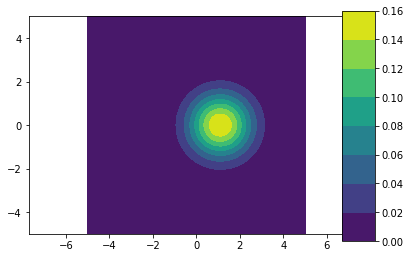

In [2]:
dx = 0.01
X = np.arange(-5, 5+dx, dx)
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.axis('equal')
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Rotation Gate

This gate shifts the $\hat{x}$ with $\hat{x}$ $\cos \phi$ - $\hat{p}\sin$ $\phi$ and $\hat{p}$ with $\hat{p}$ $\cos \phi$ + $\hat{x}$$\sin$ $\phi$. 

In [87]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
import numpy as np
import matplotlib.pyplot as plt

In [88]:
eng, q = sf.Engine(1)

In [89]:
with eng:
    Rgate(0.55)

In [90]:
state = eng.run('gaussian')

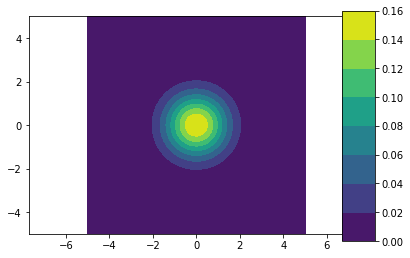

In [91]:
dx = 0.01
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.axis('equal')
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()


## Squeezing Gate

The squeezing gate shifts $\hat{x}$ with $e^{ - r}\hat{x} \phi$ and shifts $\hat{p}$ with $e^r$$\hat{p} \phi$.

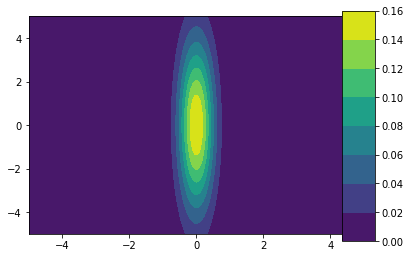

In [68]:
import strawberryfields as sf
from strawberryfields.ops import *
from strawberryfields.utils import scale
import numpy as np
import matplotlib.pyplot as plt

eng, q = sf.Engine(1)

with eng:
    S = Sgate(1)
    S | q[0]
    
state = eng.run('gaussian')
dx = 0.01
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Displacement Gate 

The displacement gate shifts the and $\hat{x}$ and $\hat{p}$ with a constant of $√2\hbar Re(α)I$

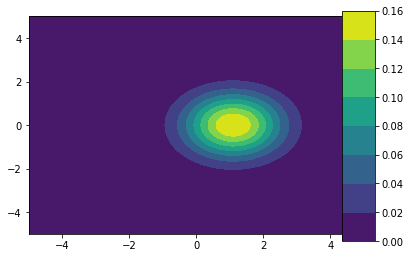

In [3]:
import strawberryfields as sf
from strawberryfields.ops import *
import matplotlib.pyplot as plt
import numpy as np
eng, q = sf.Engine(1)
with eng:
    Dgate(0.55) | q[0]
state = eng.run('gaussian')
dx = 0.1
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Quadratic Phase Gate 

The quadratic phase gate shifts $\hat{p}$ with a constant of $s\hat{x}$ but does not shift $\hat{x}$.

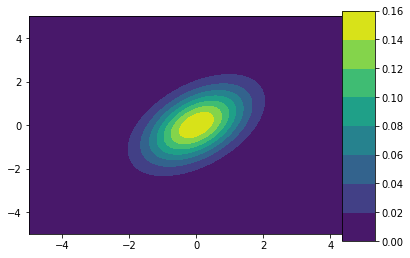

In [71]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
eng, q = sf.Engine(1)
with eng:
    P = Pgate
    P(0.55) | q[0]
state = eng.run('gaussian')
dx = 0.1
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Cubic Phase Gate 

Cubic phase gate shifts $\hat{p}$ is shifted $\gamma\hat{x}^2$ and $\hat{x}$ remains unchanged. 

This gate is non-gaussian and thus, uses the Fock backend.  

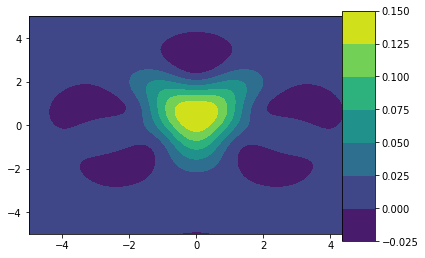

In [4]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
eng, q = sf.Engine(1)
cutoff_dim = 6
with eng:
    gamma = 0.55
    Vgate(gamma) | q[0]
state = eng.run('fock', cutoff_dim=7)
dx = 0.1
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

## Kerr Gate 

The Kerr gate is also non-gaussian and thus uses the Fock backend. 

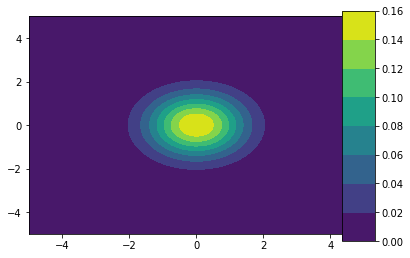

In [86]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
eng, q = sf.Engine(1)
with eng:
    kappa = 1
    Kgate(kappa) | q[0]
state = eng.run('fock', cutoff_dim=7)
dx = 0.1
w = state.wigner(0, X, X)
x, y = np.meshgrid(X, X)
plt.contourf(x, y, w)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()